In [62]:
!ls

SyncData.xlsx  nohup.out


In [63]:
import numpy
import pandas as pd

In [64]:
df = pd.read_excel("./SyncData.xlsx")

In [65]:
df

,time_H,Load_H,Res_H,Unnamed: 3,time_V,Load_V,Res_V,Unnamed: 7,time_R,Load_R,Res_R
0,0.000000,-50.492321,-29.348735,NaN,0.000000,-50.491787,-7.147780,NaN,0.000000,-50.492321,-18.590963
1,0.099999,-57.784882,-30.116238,NaN,0.099103,-57.416561,-7.211393,NaN,0.101004,-57.784882,-18.858859
2,0.199998,-65.520958,-30.642679,NaN,0.198207,-65.163918,-7.312418,NaN,0.202008,-65.520958,-19.064215
3,0.299998,-72.881187,-30.999211,NaN,0.297310,-72.527718,-7.399222,NaN,0.303012,-72.881187,-19.256227
4,0.399997,-79.665817,-31.263917,NaN,0.396413,-79.352386,-7.467273,NaN,0.404015,-79.665817,-19.407368
...,...,...,...,...,...,...,...,...,...,...,...
49994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5049.586555,-10.056506,-9.803270
49995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5049.687559,-15.210902,-10.015795
49996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5049.788562,-21.204048,-10.185714
49997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5049.889566,-27.932865,-10.322576


In [66]:
X = pd.concat([df.loc[:]["time_H"], df.loc[:]["Res_R"]], axis=1)

In [67]:
dataTrain = X[:39974]
dataTest = X[39974:49967]

In [68]:
dataTrain

,time_H,Res_R
0,0.000000,-18.590963
1,0.099999,-18.858859
2,0.199998,-19.064215
3,0.299998,-19.256227
4,0.399997,-19.407368
...,...,...
39969,3996.869506,-11.291845
39970,3996.969505,-11.278127
39971,3997.069505,-11.245393
39972,3997.169504,-11.203356


In [69]:
dataTest

,time_H,Res_R
39974,3997.369502,-11.079368
39975,3997.469501,-10.998246
39976,3997.569501,-10.914401
39977,3997.669500,-10.801342
39978,3997.769499,-10.667195
...,...,...
49962,4996.161882,-10.728813
49963,4996.261881,-10.788798
49964,4996.361880,-10.833265
49965,4996.461880,-10.865742


In [70]:
import matplotlib.pyplot as plt

In [71]:
dataTrain.iloc[:, 0]

0           0.000000
1           0.099999
2           0.199998
3           0.299998
4           0.399997
            ...     
39969    3996.869506
39970    3996.969505
39971    3997.069505
39972    3997.169504
39973    3997.269503
Name: time_H, Length: 39974, dtype: float64

In [72]:
dataTrain.iloc[:, 1]

0       -18.590963
1       -18.858859
2       -19.064215
3       -19.256227
4       -19.407368
           ...    
39969   -11.291845
39970   -11.278127
39971   -11.245393
39972   -11.203356
39973   -11.147275
Name: Res_R, Length: 39974, dtype: float64

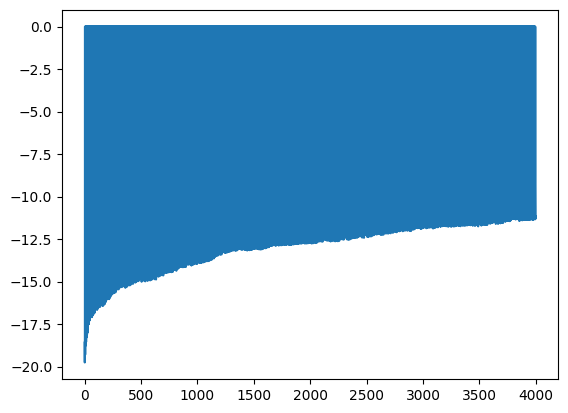

In [73]:
plt.plot(dataTrain.iloc[:, 0], dataTrain.iloc[:, 1])

In [74]:
XTrain = dataTrain[:len(dataTrain) - 1]
TTrain = dataTrain[1:len(dataTrain)]

XTest = dataTest[:len(dataTest) - 1]
TTest = dataTest[1:len(dataTest)]

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
std = StandardScaler()

In [77]:
std.fit(XTrain)
XTrain_scaled = std.transform(XTrain)
XTest_scaled = std.transform(XTest)

std.fit(TTrain)
TTrain_scaled = std.transform(TTrain)
TTest_scaled = std.transform(TTest)

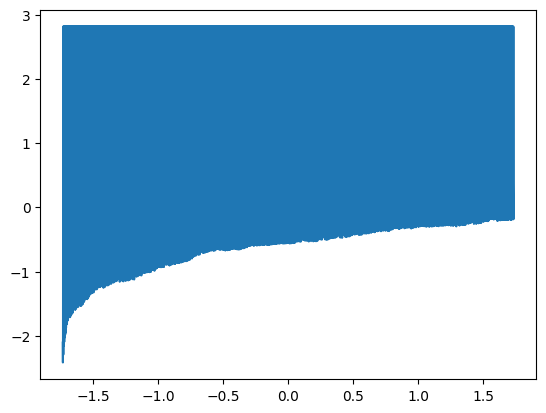

In [80]:
plt.plot(XTrain_scaled[:, 0], XTrain_scaled[:, 1])